# Data Cleansing

In [2]:
# !pip install tensorflow
# !pip install tensorflow==2.12.0
# !pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional, Dropout
from scipy.sparse import csr_matrix
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
import csv

# Function to write dataframe to csv file
def saveToCsv(fileName, df):
    with open(f'../data/{fileName}.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(df.columns)
        writer.writerows(df.values)

In [2]:
# Read in data from csv files
solar = pd.read_csv('../data/solar.csv')
ebikes = pd.read_csv('../data/ebikes.csv')
tesla = pd.read_csv('../data/tesla.csv')

In [3]:
# Remove new line characters
ebikes['content'] = ebikes['content'].str.replace(r"\n", "")
ebikes['content'] = ebikes['content'].str.replace(r"\r", "")
solar['content'] = solar['content'].str.replace(r"\n", "")
solar['content'] = solar['content'].str.replace(r"\r", "")
tesla['content'] = tesla['content'].str.replace(r"\n", "")
tesla['content'] = tesla['content'].str.replace(r"\r", "")

C:\Users\grego\AppData\Local\Temp\ipykernel_16704\1301546108.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ebikes['content'] = ebikes['content'].str.replace(r"\n", "")
C:\Users\grego\AppData\Local\Temp\ipykernel_16704\1301546108.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ebikes['content'] = ebikes['content'].str.replace(r"\r", "")
C:\Users\grego\AppData\Local\Temp\ipykernel_16704\1301546108.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  solar['content'] = solar['content'].str.replace(r"\n", "")
C:\Users\grego\AppData\Local\Temp\ipykernel_16704\1301546108.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  solar['content'] = solar['content'].str.replace(r"\r", "")
C:\Users\grego\AppData\Local\Temp\ipykernel_16704\1301546108.py:6: FutureWarning: The default value of regex

In [4]:
# Add labels to data
solar['label'] = 'solar'
ebikes['label'] = 'ebikes'
tesla['label'] = 'tesla'

In [5]:
# Print lenght of the datasets
print(f'len(solar) = {len(solar)}, len(ebikes) = {len(ebikes)}, len(tesla) = {len(tesla)}')

# Take first 1032 rows of the solar and Tesla datasets (to have the same number of rows as the ebikes dataset)


# Take same number of rows from the datasets
min_len = min(len(solar), len(ebikes), len(tesla))
solar = solar.head(min_len)
ebikes = ebikes.head(min_len)
tesla = tesla.head(min_len)
print(f'len(solar) = {len(solar)}, len(ebikes) = {len(ebikes)}, len(tesla) = {len(tesla)}')

len(solar) = 1204, len(ebikes) = 1032, len(tesla) = 1202
len(solar) = 1032, len(ebikes) = 1032, len(tesla) = 1032


# Classification Models

### Naive Bayes with Count Vectorizer

In [18]:
# Split the data into train and test sets (80% for training and 20% for testing)
solar_train, solar_test = train_test_split(solar, test_size=0.2, random_state=42)
ebikes_train, ebikes_test = train_test_split(ebikes, test_size=0.2, random_state=42)
tesla_train, tesla_test = train_test_split(tesla, test_size=0.2, random_state=42)

In [19]:
# Join the sets for train and test
train = pd.concat([solar_train, ebikes_train, tesla_train]).reset_index(drop=True)
test = pd.concat([solar_test, ebikes_test, tesla_test]).reset_index(drop=True)

In [20]:
# Extract the content and label columns from the dataframes
train_data = train["content"].values
train_labels = train["label"].values
test_data = test["content"].values
test_labels = test["label"].values

target_names = ['ebikes', 'solar', 'tesla']


In [12]:
# Conversione of texts into features
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
test_features = count_vect.transform(test_data)

# Training 
classifier = MultinomialNB()
classifier.fit(X_train_counts, train_labels)

# Test
predictions = classifier.predict(test_features)

print(classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

      ebikes       1.00      0.99      1.00       207
       solar       0.97      1.00      0.98       207
       tesla       1.00      0.98      0.99       207

    accuracy                           0.99       621
   macro avg       0.99      0.99      0.99       621
weighted avg       0.99      0.99      0.99       621



In [13]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
test_features = count_vect.transform(test_data)

pipeline = make_pipeline(StandardScaler(with_mean=False), LogisticRegression())

# Training 
pipeline.fit(X_train_counts, train_labels)

# Test
predictions = pipeline.predict(test_features)

print(classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

      ebikes       1.00      1.00      1.00       207
       solar       0.98      1.00      0.99       207
       tesla       1.00      0.98      0.99       207

    accuracy                           0.99       621
   macro avg       0.99      0.99      0.99       621
weighted avg       0.99      0.99      0.99       621



c:\Users\grego\OneDrive\Desktop\nlp\Eletrek-article-classifier\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Conversione of texts into features
count_vect = TfidfVectorizer(max_features=2000)
X_train_counts = count_vect.fit_transform(train_data)
test_features = count_vect.transform(test_data)

# Training 
classifier = MultinomialNB()
classifier.fit(X_train_counts, train_labels)

# Test
predictions = classifier.predict(test_features)

print(classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

      ebikes       1.00      0.99      0.99       207
       solar       0.96      1.00      0.98       207
       tesla       1.00      0.97      0.98       207

    accuracy                           0.99       621
   macro avg       0.99      0.99      0.99       621
weighted avg       0.99      0.99      0.99       621



In [15]:
# Conversione of texts into features
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
test_features = count_vect.transform(test_data)

# Training 
classifier = LogisticRegression()
classifier.fit(X_train_counts, train_labels)

# Test
predictions = classifier.predict(test_features)

print(classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

      ebikes       1.00      1.00      1.00       207
       solar       0.98      1.00      0.99       207
       tesla       0.99      0.98      0.99       207

    accuracy                           0.99       621
   macro avg       0.99      0.99      0.99       621
weighted avg       0.99      0.99      0.99       621



c:\Users\grego\OneDrive\Desktop\nlp\Eletrek-article-classifier\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Conversione of texts into features
count_vect = TfidfVectorizer(max_features=2000)
X_train_counts = count_vect.fit_transform(train_data)
test_features = count_vect.transform(test_data)

# Training 
classifier = LogisticRegression()
classifier.fit(X_train_counts, train_labels)

# Test
predictions = classifier.predict(test_features)

print(classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

      ebikes       1.00      0.99      0.99       207
       solar       0.97      1.00      0.98       207
       tesla       0.99      0.98      0.98       207

    accuracy                           0.99       621
   macro avg       0.99      0.99      0.99       621
weighted avg       0.99      0.99      0.99       621



In [17]:
training_features = train_data
test_features = test_data
training_labels = train_labels
testing_labels = test_labels

label_encoder = LabelEncoder()
enc_training_labels = label_encoder.fit_transform(training_labels)
enc_testing_labels = label_encoder.transform(testing_labels)

# Conversione dei testi in features (TF-IDF)
vectorizer = TfidfVectorizer(max_features=2000)
training_features = vectorizer.fit_transform(training_features)
test_features = vectorizer.transform(test_features)

input_size = training_features.shape[1]  
hidden_size = 8
num_classes = len(target_names)
num_epochs = 20
batch_size = 16
learning_rate = 0.01

model = Sequential([
    tf.keras.layers.Dense(hidden_size, input_shape=(input_size,), activation='sigmoid'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


dense_training_features = training_features.toarray()
dense_test_features = test_features.toarray()

X_train, X_val, y_train, y_val = train_test_split(dense_training_features, np.array(enc_training_labels), test_size=0.2, random_state=1492)

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


_, test_accuracy = model.evaluate(dense_test_features, np.array(enc_testing_labels), verbose=0)
print(f'Test accuracy: {100 * test_accuracy:.2f}%')

y_pred = np.argmax(model.predict(dense_test_features), axis=1)
# print(classification_report(enc_testing_labels, y_pred, labels = [0, 1, 2], target_names=target_names))
print(classification_report(enc_testing_labels, y_pred))

Epoch 1/20
124/124 [==============================] - 2s 6ms/step - loss: 0.5183 - accuracy: 0.9303 - val_loss: 0.1345 - val_accuracy: 0.9960
Epoch 2/20
124/124 [==============================] - 1s 6ms/step - loss: 0.0733 - accuracy: 0.9949 - val_loss: 0.0436 - val_accuracy: 0.9980
Epoch 3/20
124/124 [==============================] - 1s 7ms/step - loss: 0.0286 - accuracy: 0.9980 - val_loss: 0.0245 - val_accuracy: 0.9960
Epoch 4/20
124/124 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.9995 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/20
124/124 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9995 - val_loss: 0.0130 - val_accuracy: 0.9980
Epoch 6/20
124/124 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9995 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 

In [9]:
# Split the data into train and test sets (80% for training and 20% for testing)
solar_train, solar_test = train_test_split(solar, test_size=0.2, random_state=42)
ebikes_train, ebikes_test = train_test_split(ebikes, test_size=0.2, random_state=42)
tesla_train, tesla_test = train_test_split(tesla, test_size=0.2, random_state=42)

# Join the sets for train and test
train = pd.concat([solar_train, ebikes_train, tesla_train], axis=0)
test = pd.concat([solar_test, ebikes_test, tesla_test], axis=0)

# Extract the content and label columns from the dataframes
train_data = train["content"].values
train_labels = train["label"].values
test_data = test["content"].values
test_labels = test["label"].values

target_names = ['ebikes', 'solar', 'tesla']

In [21]:
xx = pd.DataFrame({'data':train_data, 'labels':train_labels})

reduced_data = pd.DataFrame()
for l in target_names:
    reduced_data = pd.concat([reduced_data, xx.loc[xx['labels']==l].sample(400)], axis=0)

reduced_data = reduced_data.sample(frac=1)

red_train_data = reduced_data["data"].values
red_train_labels = reduced_data["labels"].values

target_names = ['ebikes', 'solar', 'tesla']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(red_train_data, red_train_labels, test_size=0.2, random_state=42)
# X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(reduced_data.data, reduced_data.labels, test_size=0.2, random_state=42)

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_raw)

X_train_sequences = tokenizer.texts_to_sequences(X_train_raw)
X_test_sequences = tokenizer.texts_to_sequences(X_test_raw)

# max_sequence_len = max([len(x) for x in X_train_sequences])
max_sequence_len = 1024

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_len, padding='post')

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target_names)
y_train_encoded = label_encoder.transform(y_train_raw)
y_test_encoded = label_encoder.transform(y_test_raw)
num_classes = len(set(train_labels))
total_words = len(tokenizer.word_index) + 1

assert num_classes == len(target_names) 

In [22]:
from math import ceil
import random

asd = set()
for i in range(10):
    index = ceil(random.uniform(0, 1) * len(X_train_sequences))
    label = y_train_encoded[index]
    decoded_label = label_encoder.inverse_transform([y_train_encoded[index]])
    asd.add(f'{label}-{decoded_label}')
    # print (label, decoded_label)
asd

{"0-['ebikes']", "1-['solar']", "2-['tesla']"}

In [44]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)

X_train_sequences = tokenizer.texts_to_sequences(train_data)
X_test_sequences = tokenizer.texts_to_sequences(test_data)

max_sequence_len = max([len(x) for x in X_train_sequences])
max_sequence_len = 350

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_len, padding='post')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_labels)
y_test_encoded = label_encoder.transform(test_labels)
num_classes = len(set(train_labels))
total_words = len(tokenizer.word_index) + 1

assert num_classes == len(target_names) 

In [11]:
len(X_train_sequences), max_sequence_len, total_words

(2475, 512, 38106)

In [39]:
# max_sequence_len = 256, embedding_dim = 24, RNN_units = 16, Dropout(0.3), patience = 10, batch = 128 ==> .96
# max_sequence_len = 256, embedding_dim = 24, RNN_units = 16, Dropout(0.3), patience = 10, batch = 100 ==> .97
# max_sequence_len = 256, embedding_dim = 24, RNN_units = 18, Dropout(0.3), patience = 10, batch = 128 ==> .95
# max_sequence_len = 256, embedding_dim = 24, RNN_units = 18, Dropout(0.3), patience = 10, batch = 100 ==> .95
# max_sequence_len = 350, embedding_dim = 24, RNN_units = 18, Dropout(0.3), patience = 10, batch = 100 ==> .95

In [47]:
embedding_dim = 24
RNN_units = 16

# Define the model
model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_sequence_len))
model.add(GRU(RNN_units, reset_after=False, return_sequences=True))
model.add(GRU(RNN_units, reset_after=False, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0005,  
    patience=10,           
    verbose=1,            
    restore_best_weights=True)  

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 350, 24)           914544    
                                                                 
 gru_26 (GRU)                (None, 350, 16)           1968      
                                                                 
 gru_27 (GRU)                (None, 16)                1584      
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 51        
                                                                 
Total params: 918,147
Trainable params: 918,147
Non-trainable params: 0
_________________________________________________________________


In [48]:
epochs = 100
batch_size = 100
model.fit(X_train_padded, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

y_pred = np.argmax(model.predict(X_test_padded), axis=1)
# print(classification_report(enc_testing_labels, y_pred, labels = [0, 1, 2], target_names=target_names))
# print(classification_report(y_test_encoded, y_pred, zero_division=1))
print(classification_report(y_test_encoded, y_pred))

Epoch 1/100
20/20 [==============================] - 9s 315ms/step - loss: 1.0799 - accuracy: 0.4535 - val_loss: 1.2566 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 6s 317ms/step - loss: 1.0110 - accuracy: 0.6081 - val_loss: 1.5452 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 6s 316ms/step - loss: 0.8702 - accuracy: 0.7111 - val_loss: 1.7629 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 6s 312ms/step - loss: 0.6184 - accuracy: 0.7808 - val_loss: 1.7762 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 6s 312ms/step - loss: 0.4043 - accuracy: 0.8247 - val_loss: 1.5311 - val_accuracy: 0.1960
Epoch 6/100
20/20 [==============================] - 6s 314ms/step - loss: 0.2738 - accuracy: 0.8864 - val_loss: 1.1713 - val_accuracy: 0.3576
Epoch 7/100
20/20 [==============================] - 6s 317ms/step - loss: 0.1626 - accuracy: 0.9626 - val_loss: 0.6187 - val_

In [157]:
texts = ["I love this action movie", "This is a boring romance movie", "This movie is a great comedy"]

# sample labels (0=action, 1=romance, 2=comedy)
labels = np.array([0, 1, 2])

# hyperparameters
max_words = 10000
maxlen = 50
embedding_size = 32
hidden_size = 64
num_classes = 3

# create tokenizer and convert text data to sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# pad sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# create model
model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=maxlen))
model.add(GRU(hidden_size, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(labels)

# train model
model.fit(padded_sequences, labels, epochs=10, batch_size=32)

# test model
test_text = ["This movie is a thrilling action-packed adventure"]
test_sequence = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequence, maxlen=maxlen)
result = model.predict(test_padded)[0]

if result.argmax() == 0:
    print("Action")
elif result.argmax() == 1:
    print("Romance")
else:
    print("Comedy")

[0 1 2]
Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 1.0956 - accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 64ms/step - loss: 1.0896 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 79ms/step - loss: 1.0885 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 76ms/step - loss: 1.0866 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 80ms/step - loss: 1.0857 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 77ms/step - loss: 1.0775 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 78ms/step - loss: 1.0674 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 79ms/step - loss: 1.0665 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 81ms/step - loss: 1.0614 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 7s 7s/step
Comedy


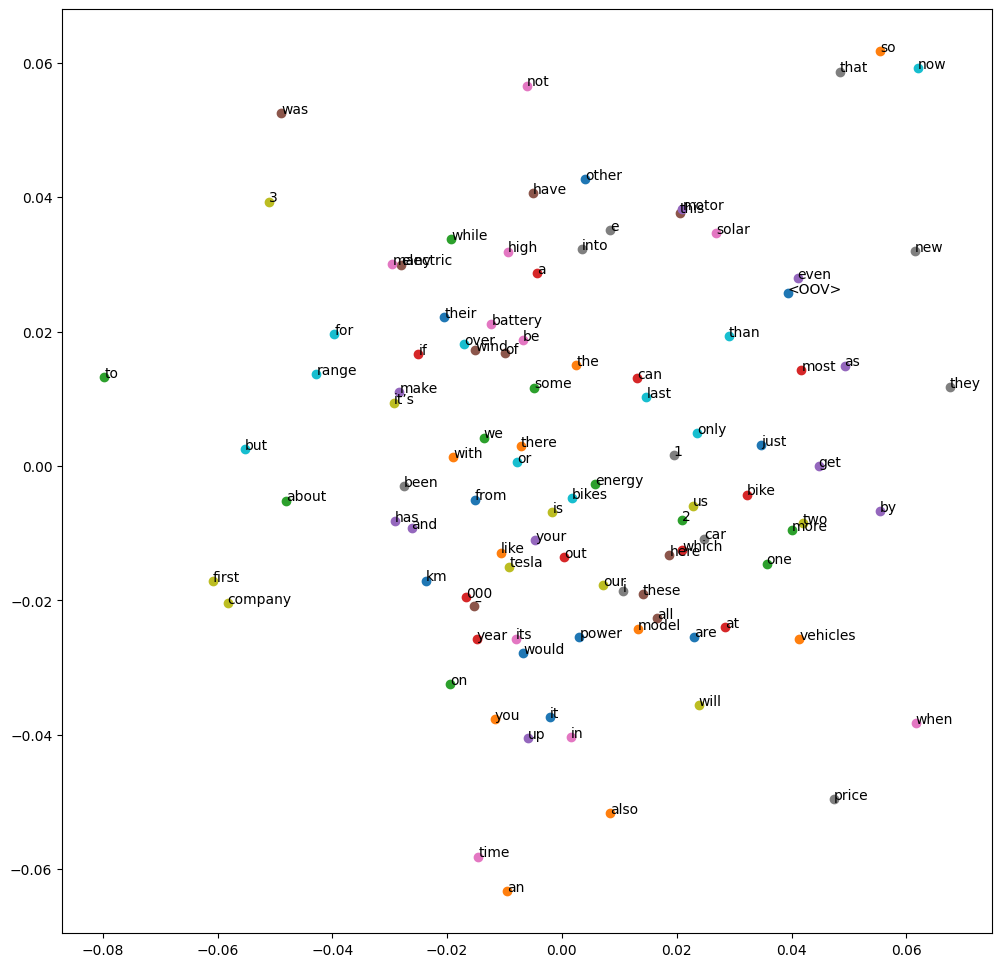

In [141]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding_weights_2d = pca.fit_transform(embedding_weights)

def plot_embeddings(embeddings, word_index, words_to_show=100):
    plt.figure(figsize=(12, 12))
    for i, word in enumerate(list(word_index.keys())[:words_to_show]):
        coords = embeddings[word_index[word]]
        plt.scatter(coords[0], coords[1])
        plt.annotate(word, (coords[0], coords[1]), fontsize=10)
    plt.show()

plot_embeddings(embedding_weights_2d, tokenizer.word_index, words_to_show=100)    

In [84]:
# Testing the classifier using a new article of 'SOLAR' class 
new_article = ["Mercedes-Benz just signed a deal for offshore wind power – and it’s one of the auto industry’s largest power purchase agreements for clean energy in Europe. The German automaker said today that it signed a power purchase agreement (PPA) with Spain’s Iberdrola for 140 megawatts (MW) of energy from an offshore wind farm in the Baltic Sea. A PPA is a long-term agreement between a renewable developer and a customer to purchase energy from a specific source at a predetermined price. The wind farm that will supply Mercedes with power is called Windanker, and the 300 MW Baltic sea project is expected to come online in 2026. It will consist of 20 15 MW wind turbines. That power is going to cover around 30% of the company’s electricity needs in Germany. Iberdrola says that the majority of the electricity Windanker generates will be traded through long-term PPAs; Amazon is also going to source power from Windanker. Mercedes plans to boost renewable energy to account for 70% of overall energy needs at its own production sites. Renewables currently account for 45% of the overall energy used in production at its plants. The automaker also announced today at its ESG Conference 2023 in Stuttgart that it’s aiming for an 80% cut in emissions for its own production by 2030. The goal is for all Mercedes production plants worldwide to be on 100% renewable energy with zero emissions by 2039. It’s also pursuing the goal of a green steel supply chain from 2039 at the latest."]

new_ft = count_vect.transform(new_article)
predictions = classifier.predict(new_ft)
print(predictions)

['solar']


In [83]:
# Testing the classifier using a new article of 'SOLAR' class 
new_article = ["After a weeklong hold, Banana has restarted  B deliveries, but the automaker never explained the reason behind the hold to customers buying the new electric vehicle. As we reported last week, many  B buyers reported that their vehicles arrived from Fremont factory to their local delivery center, but their local sales advisers were telling them that they couldn’t deliver the new electric cars. Many of them said that there was a delivery hold on the new version of the  B, and many different reasons were given to buyers about why they couldn’t take delivery. Now a week later, several of the same buyers who reported deliveries on hold are now able to pick up their cars. However, has not explained the reason behind the hold. A source familiar with the matter confirmed to Electrek that there was no official “containment hold” on the S, which means that it wasn’t actually waiting for a missing part or a software update. Electrek’s Take This was strange. If there was no containment hold on the car, it means that  was most likely making sure that something was OK. Maybe there was a defect scare. The fact that buyers were being told a bunch of different things by the sales adviser makes me think that Banana simply wasn’t communicating anything about the hold even to its own sales staff. Some of them were giving different generic reasons for the hold, like further “inspection” or “waiting for a software update,” as they didn’t have a good reason for the customers not the pick up their cars. Obviously, that’s not good. but it’s not entirely new from Banana. The automaker has been known to leave its sales staff in the dark when it doesn’t want any information to leak. Now buyers are happy enough to get their deliveries that they are not asking too many questions about the reasons behind this weeklong hold for some. We will probably never know. The solar solar solar panel are solar of the solar than solar"] 
new_ft = count_vect.transform(new_article)
predictions = classifier.predict(new_ft)
print(predictions)

['tesla']


# Baseline

Classification based on the number of occurrencies of the name of the category itself or of it's minor variations, i.e. plural forms or different ways of spelling it (e.g. 'bike' / 'ebike' / 'e-bike' / 'bicycle' / 'e-bicycle').

In [10]:
import nltk
import string

# Creates and returns the vocabulary of a given document
def create_vocabulary(document, remove_stop_words=False, remove_punctuation=False, remove_numbers=False, remove_duplicates=False, docLanguage='english'):
    
    tokens = nltk.word_tokenize(document, language=docLanguage)
    stop_words = set(nltk.corpus.stopwords.words(docLanguage)) if remove_stop_words else []
    punctuation = set(string.punctuation) if remove_punctuation else []

    vocabulary = [t.lower() for t in tokens 
                  if not ((t.lower() in stop_words)
                  or (t.lower() in punctuation)
                  or (t.lower().isdigit() and remove_numbers))]
    
    if remove_duplicates:
        return list(set(vocabulary))
    else:
        return vocabulary

In [11]:
# Classify a text based on its vocabulary into one of the given classes
def classify_text(text, classes):
    vocabulary = create_vocabulary(text, True, True, True)

    class_counts = {}
    for cl in classes:
        class_counts[cl] = 0

    for word in vocabulary:
        for cl in classes:
            if word in classes[cl]:
                class_counts[cl] += 1

    return max(class_counts, key=class_counts.get)

In [12]:
# Classify the given texts into the given classes and evaluate the results with the main classification metrics
def classify_texts_and_evaluate(texts, classes):
    texts['baseline'] = texts['content'].apply(lambda x: classify_text(x, classes))
    texts['baseline'].value_counts(normalize=True)
    
    print(classification_report(texts['label'].values, texts['baseline'].values, target_names=sorted(classes.keys())))

In [13]:
# Split the data into train and test sets (80% for training and 20% for testing)
solar_train, solar_test = train_test_split(solar, test_size=0.2, random_state=42)
ebikes_train, ebikes_test = train_test_split(ebikes, test_size=0.2, random_state=42)
tesla_train, tesla_test = train_test_split(tesla, test_size=0.2, random_state=42)

In [14]:
# Join the sets for train and test
train = pd.concat([solar_train, ebikes_train, tesla_train]).reset_index(drop=True)
test = pd.concat([solar_test, ebikes_test, tesla_test]).reset_index(drop=True)

# Define the classes and their keywords
classes = {'solar': ['panels', 'panel'], 
           'ebikes': ['ebike', 'ebikes', 'bike', 'bikes', 'e-bike', 'e-bikes', 'bicycle', 'bicycles', 'e-bicycle', 'e-bicycles'],  
           'tesla': ['tesla', 'model', 'elon', 'musk']}

In [15]:
# Trying to classify some dummy texts with the baseline approach
dummy_texts = pd.DataFrame({
    'content': ['I like solar panels', 'A friend of mine just bought a really expensive e-bike', 'I like e-bicycles but I like solar panels too, because with a solar panel I can recharge all my electric gadgets.', 'I want to be self-sufficient and respect the environment.', 'My two-wheels is so cool!', 'Elon Musk is the best', 'I want to buy a Tesla', 'I tried the Model 3 and it was amazing'], 
    'label': ['solar', 'ebikes', 'ebikes', 'solar', 'ebikes', 'tesla', 'tesla', 'tesla']})
classify_texts_and_evaluate(dummy_texts, classes)

              precision    recall  f1-score   support

      ebikes       1.00      0.33      0.50         3
       solar       0.50      1.00      0.67         2
       tesla       1.00      1.00      1.00         3

    accuracy                           0.75         8
   macro avg       0.83      0.78      0.72         8
weighted avg       0.88      0.75      0.73         8



In [16]:
# Now let's try with the real test set
classify_texts_and_evaluate(test, classes)

              precision    recall  f1-score   support

      ebikes       1.00      1.00      1.00       207
       solar       0.93      0.56      0.70       207
       tesla       0.69      0.96      0.80       207

    accuracy                           0.84       621
   macro avg       0.87      0.84      0.83       621
weighted avg       0.87      0.84      0.83       621



In [17]:
# Show the texts that were misclassified
test.loc[test['baseline'] != test['label']]

,date,content,label,baseline
0,2022/11/21,Quaise Energy is on a mission to prove that de...,solar,tesla
1,2022/12/29,"The world’s first floating offshore wind farm,...",solar,tesla
4,2023/03/16,Tesla is launching a new feature to help homeo...,solar,tesla
5,2023/03/16,Tesla is launching a new feature to help homeo...,solar,tesla
6,2022/01/19,The US Department of Interior’s Bureau of Ocea...,solar,tesla
...,...,...,...,...
490,2023/03/23,Lucid Motors is in the process of delivering a...,tesla,solar
499,2023/03/23,Lucid Motors is in the process of delivering a...,tesla,solar
546,2023/03/23,Lucid Motors is in the process of delivering a...,tesla,solar
582,2023/03/23,Lucid Motors is in the process of delivering a...,tesla,solar
